<a href="https://colab.research.google.com/github/meghanapokuru/ybiprojects/blob/main/internship_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#                  **Mileage Prediction - Regression Analysis**

It seeks to develop a robust and interpretable regression model that accurately estimates vehicle mileage based on relevant attributes.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.


In [ ]:

#Import Library

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



In [ ]:

#Import Data

df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000



Remove Missing Values

In [ ]:
df = df.dropna()

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB



Data Visualization

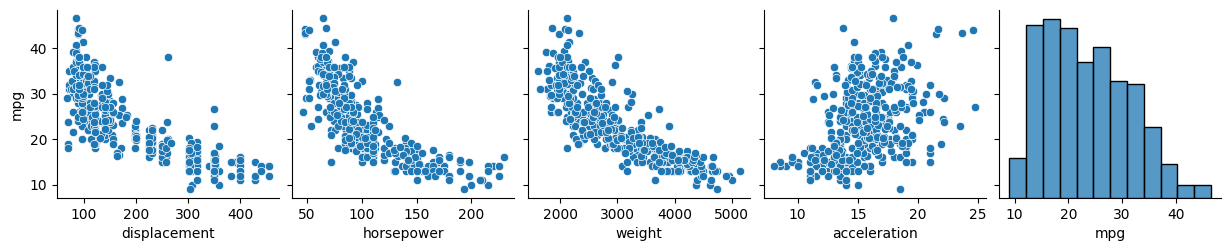

In [ ]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

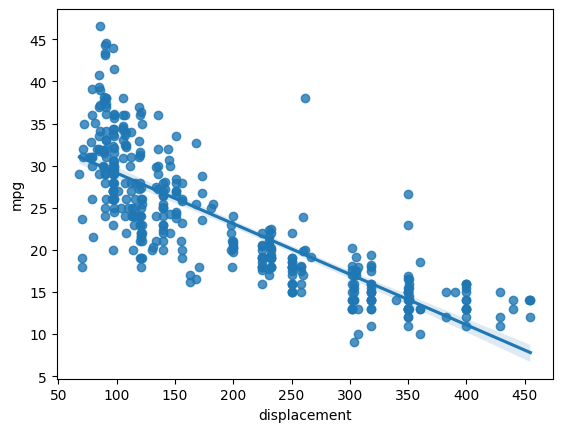

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

y.shape



(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

x.shape



(392, 4)


# Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

pd.DataFrame(x).describe()



,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00



# Train Test Split Data


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape



((274, 4), (118, 4), (274,), (118,))


# Modeling
# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()




# Train or Fit model

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

23.71890126044777

In [ ]:
lr.coef_

array([-0.850248  , -1.68628122, -4.42529273, -0.28294825])


# Prediction
# Predict Test Data

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
y_pred

array([23.7320304 , 26.32473781, 29.76223547, 30.89737983, 26.51787447,
       26.24222343, 16.48090794, 24.79038023, 28.18711864, 24.31199917,
       30.38967778, 23.89374334, 30.62395612, 27.03025564, 31.37831428,
       16.54982965, 24.31048531, 28.14809111, 25.03229433, 24.00135078,
       23.4111198 , 16.0255498 , 13.76508175, 28.85944427, 18.14338376,
       21.63378231, 31.19203491, 25.7197573 , 31.26227444, 28.0112584 ,
       13.80963922, 31.30672175, 28.94040832, 25.05170747, 31.66690312,
       30.29561593, 27.27586164, 29.29135474, 30.02815374, 24.36189883,
       26.56093812, 13.39874897, 17.12396158, 28.85916789, 25.1824764 ,
       18.5476273 , 32.79608312, 29.68259586, 30.34132403, 13.13070894,
       25.39546997, 20.7559715 , 14.57070864, 30.02908347, 28.52286162,
       30.4931547 ,  9.55603844, 30.66405454, 29.31407813, 22.34422854,
       31.59832429, 20.82834876, 21.75991447, 30.11657074, 30.30421893,
       20.58839994, 20.87027159, 14.54792218, 10.3104346 , 15.06


# Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

mean_absolute_error(ytest, y_pred)



3.4620928407491705

In [ ]:
mean_absolute_percentage_error(ytest, y_pred)

0.1548635152077309

In [ ]:
r2_score(ytest, y_pred)

0.660946090344667


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

x_train2 = poly.fit_transform(xtrain)

x_test2 = poly.fit_transform(xtest)

lr.fit(x_train2, ytrain)



LinearRegression()

In [ ]:
lr.intercept_

21.245807737266013

In [ ]:
lr.coef_

array([-2.21037077, -5.47605474, -1.74916468, -1.32386985,  0.78935153,
        1.03619137,  1.29654531,  0.56120637, -2.05835255,  0.92184123])

In [ ]:
y_pred_poly = lr.predict(x_test2)


# Model Accuracy

In [ ]:
mean_absolute_error(ytest, y_pred_poly)

3.2971728696118596

In [ ]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.14564464400211077

In [ ]:
r2_score(ytest, y_pred_poly)

0.6558034926484075


# Explaination
The "Mileage Prediction - Regression Analysis" project is about creating a smart tool that can guess how many miles a vehicle can travel using a certain amount of fuel. Imagine you want to know how far different cars can go before they need more gas. This project uses clever calculations and data to make an educated guess. It looks at things like the car's size, weight, and how powerful its engine is. By doing this for lots of cars, we can help people choose cars that use fuel more efficiently. It's like having a mileage fortune teller that helps you pick a car that goes a long way on a single tank of gas!